In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data/icml_face_data.csv')

# Separate the data based on the 'Usage' column
train_data = data[data[' Usage'] == 'Training']
public_test_data = data[data[' Usage'] == 'PublicTest']
private_test_data = data[data[' Usage'] == 'PrivateTest']

# Combine public test and private test data into a single test set
test_data = pd.concat([public_test_data, private_test_data], ignore_index=True)

# Separate the features and labels
X_train_raw = train_data[' pixels'].values
y_train = train_data['emotion'].values
X_test_raw = test_data[' pixels'].values
y_test = test_data['emotion'].values

# Function to convert pixel strings into NumPy arrays
def convert_pixels_to_array(pixels, image_size=48):
    array = np.zeros((pixels.shape[0], image_size, image_size, 1))
    for i, pixel_sequence in enumerate(pixels):
        pixels_array = np.array(pixel_sequence.split(), dtype='float32')
        pixels_array = pixels_array.reshape(image_size, image_size, 1)
        array[i] = pixels_array
    return array

# Convert pixel strings to NumPy arrays and normalize the pixel values
X_train = convert_pixels_to_array(X_train_raw) / 255.0
X_test = convert_pixels_to_array(X_test_raw) / 255.0


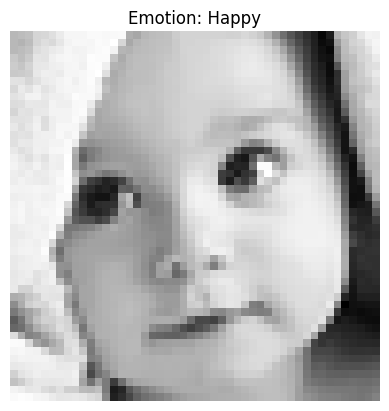

In [2]:
import matplotlib.pyplot as plt
import random

# Create a dictionary to map the numeric emotion code to its corresponding text label
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

def display_random_image(X, y):
    # Select a random index
    random_index = random.randint(0, len(X) - 1)
    
    # Get the corresponding image and label
    img = X[random_index]
    label = y[random_index]
    
    # Map the numeric label to its text label
    text_label = emotion_labels[label]
    
    # Display the image using matplotlib
    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(f'Emotion: {text_label}')
    plt.axis('off')
    plt.show()

# Display a random image from the dataset
display_random_image(X_train, y_train)


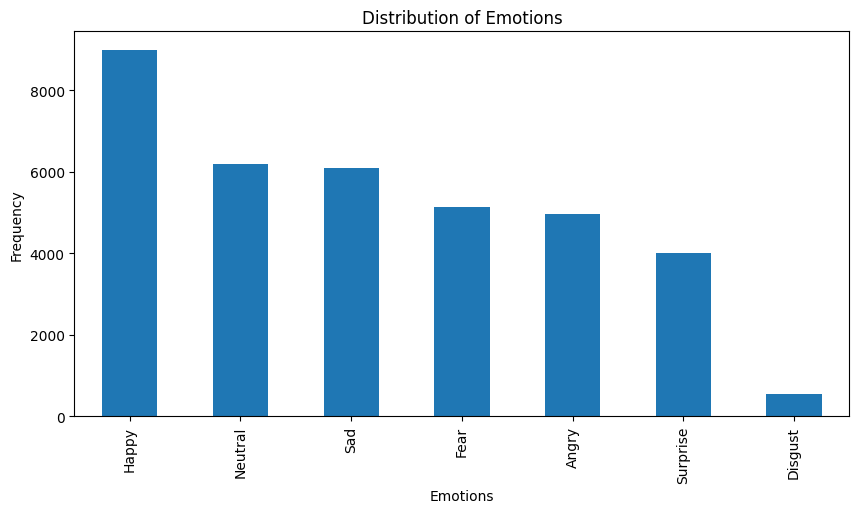

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with the column 'emotion'
emotion_counts = data['emotion'].value_counts()
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Replace numeric labels with text labels
emotion_counts.index = [emotion_labels[label] for label in emotion_counts.index]

# Create a bar plot of the emotion counts
plt.figure(figsize=(10, 5))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(num_filters=[32, 64], filter_size=(3, 3), pool_size=(2, 2), dense_units=128, dropout_rate=0.5):
    model = Sequential()
    
    # First convolutional and pooling layers
    model.add(Conv2D(num_filters[0], filter_size, activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=pool_size))

    # Second convolutional and pooling layers
    model.add(Conv2D(num_filters[1], filter_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(7, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [5]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

# # Reshape the data to be in the format required by the CNN
# X_train_cnn = X_train.reshape(X_train.shape[0], 48, 48, 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], 48, 48, 1)

# # Wrap the model function with KerasClassifier
# model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=64, verbose=0)

# # Define the parameter grid
# param_grid = {
#     'num_filters': [[32, 64], [64, 128]],
#     'filter_size': [(3, 3), (5, 5)],
#     'dense_units': [128, 256],
#     'dropout_rate': [0.25, 0.5]
# }

# # Create the GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=3)

# # Fit the grid search object to the training data
# grid_result = grid.fit(X_train_cnn, y_train)


In [6]:
# # Get the best parameters and score
# best_params = grid_result.best_params_
# best_score = grid_result.best_score_

# print("Best parameters:", best_params)
# print("Best score:", best_score)

In [7]:
# # Evaluate the best model on the test data
# best_model = grid_result.best_estimator_.model
# test_loss, test_acc = best_model.evaluate(X_test_cnn, y_test, verbose=0)

# print("Test loss:", test_loss)
# print("Test accuracy:", test_acc)

In [8]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Build and compile the best model with the best parameters
# best_model = build_model(
#     num_filters=best_params['num_filters'],
#     filter_size=best_params['filter_size'],
#     dense_units=best_params['dense_units'],
#     dropout_rate=best_params['dropout_rate']
# )

# # Train the best model with early stopping
# history = best_model.fit(
#     X_train, y_train,
#     epochs=500,
#     batch_size=64,
#     validation_data=(X_test, y_test),
#     callbacks=[early_stop]
# )

# # Evaluate the best model on the test data
# test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)

# print("Test loss:", test_loss)
# print("Test accuracy:", test_acc)


In [9]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [10]:
# plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import BatchNormalization

def build_model_v2(num_filters_list, filter_size_list, dense_units, dropout_rate_list):
    model = Sequential()

    # First convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[0], filter_size_list[0], activation='relu', padding='same', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())

    # Second convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[1], filter_size_list[1], activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate_list[0]))

    # Third convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[2], filter_size_list[2], activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fourth convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[3], filter_size_list[3], activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate_list[1]))

    # Fifth convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[4], filter_size_list[4], activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Sixth convolutional layer with batch normalization
    model.add(Conv2D(num_filters_list[5], filter_size_list[5], activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate_list[2]))

    # Flatten layer to convert the 3D feature maps to 1D feature vectors
    model.add(Flatten())

    # Fully connected dense layer with batch normalization
    model.add(Dense(dense_units, activation='relu'))
    model.add(BatchNormalization())

    # Dropout layer
    model.add(Dropout(dropout_rate_list[3]))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(7, activation='softmax'))

    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model




In [13]:



# Wrap the v2 model function with KerasClassifier
model_v2 = KerasClassifier(build_fn=build_model_v2, verbose=3)

param_grid_v2 = {
    'num_filters_list': [
        (32, 32, 64, 64, 128, 128),
        (32, 64, 64, 128, 128, 256),
        (64, 64, 128, 128, 256, 256),
        (64, 128, 128, 256, 256, 512)
    ],
    'filter_size_list': [
        (3, 3, 3, 3, 3, 3),
        (5, 5, 5, 5, 5, 5),
        (3, 3, 5, 5, 3, 3),
        (5, 5, 3, 3, 5, 5)
    ],
    'dense_units': [128, 256, 512],
    'dropout_rate_list': [
        (0.2, 0.2, 0.2, 0.2),
        (0.3, 0.3, 0.3, 0.3),
        (0.4, 0.4, 0.4, 0.4),
        (0.5, 0.5, 0.5, 0.5),
        (0.25, 0.3, 0.35, 0.4)
    ],
    'batch_size': [32, 64, 128],
    'epochs': [10],
}

# Run the RandomizedSearchCV with the new model
random_search_v2 = RandomizedSearchCV(
    estimator=model_v2,
    param_distributions=param_grid_v2,
    n_iter=80,
    cv=3,
    verbose=3,
    n_jobs=1,
    random_state=42
)

# Fit the new model
random_search_v2.fit(X_train, y_train, validation_data=(X_test, y_test))

# Print the best parameters
print("Best parameters found:", random_search_v2.best_params_)


C:\Users\Jonat\AppData\Local\Temp\ipykernel_14828\585324246.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_v2 = KerasClassifier(build_fn=build_model_v2, verbose=3)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/3] END batch_size=64, dense_units=256, dropout_rate_list=(0.3, 0.3, 0.3, 0.3), epochs=10, filter_size_list=(5, 5, 5, 5, 5, 5), num_filters_list=(32, 32, 64, 64, 128, 128);, score=0.562 total time= 1.2min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 2/3] END batch_size=64, dense_units=256, dropout_rate_list=(0.3, 0.3, 0.3, 0.3), epochs=10, filter_size_list=(5, 5, 5, 5, 5, 5), num_filters_list=(32, 32, 64, 64, 128, 128);, score=0.580 total time= 1.2min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 3/3] END batch_size=64, dense_units=256, dropout_rate_list=(0.3, 0.3, 0.3, 0.3), epochs=10, filter_size_list=(5, 5, 5, 5, 5, 5), num_filters_list=(32, 32, 64, 64, 128, 128);, score=

In [14]:
# Print the best parameters in a format that can be copied and pasted
print("Best parameters:")
print("{")
for key, value in random_search_v2.best_params_.items():
    print(f"    '{key}': {value},")
print("}")



Best parameters:
{
    'num_filters_list': (64, 128, 128, 256, 256, 512),
    'filter_size_list': (5, 5, 5, 5, 5, 5),
    'epochs': 10,
    'dropout_rate_list': (0.4, 0.4, 0.4, 0.4),
    'dense_units': 128,
    'batch_size': 32,
}


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Hardcoded best parameters after running the grid search
best_params_v2 = {
    'num_filters_list': (64, 128, 128, 256, 256, 512),
    'filter_size_list': (5, 5, 5, 5, 5, 5),
    'dropout_rate_list': (0.4, 0.4, 0.4, 0.4),
    'dense_units': 128,
}

# Build and compile the best model with the best parameters
best_model_v2 = build_model_v2(
    num_filters_list=best_params_v2['num_filters_list'],
    filter_size_list=best_params_v2['filter_size_list'],
    dense_units=best_params_v2['dense_units'],
    dropout_rate_list=best_params_v2['dropout_rate_list']
)

# Train the best model with early stopping
history_v2 = best_model_v2.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluate the best model on the test data
test_loss_v2, test_acc_v2 = best_model_v2.evaluate(X_test, y_test, verbose=0)

print("Test loss (v2):", test_loss_v2)
print("Test accuracy (v2):", test_acc_v2)


Epoch 1/500
898/898 [==============================] - 40s 43ms/step - loss: 1.8870 - accuracy: 0.2969 - val_loss: 1.5657 - val_accuracy: 0.3833
Epoch 2/500
898/898 [==============================] - 41s 45ms/step - loss: 1.4075 - accuracy: 0.4601 - val_loss: 1.3459 - val_accuracy: 0.4834
Epoch 3/500
898/898 [==============================] - 44s 49ms/step - loss: 1.2480 - accuracy: 0.5271 - val_loss: 1.2917 - val_accuracy: 0.5085
Epoch 4/500
898/898 [==============================] - 44s 49ms/step - loss: 1.1812 - accuracy: 0.5550 - val_loss: 1.3362 - val_accuracy: 0.4698
Epoch 5/500
898/898 [==============================] - 45s 50ms/step - loss: 1.0835 - accuracy: 0.5938 - val_loss: 1.2593 - val_accuracy: 0.5474
Epoch 6/500
898/898 [==============================] - 44s 49ms/step - loss: 1.0376 - accuracy: 0.6116 - val_loss: 1.1704 - val_accuracy: 0.5564
Epoch 7/500
898/898 [==============================] - 45s 50ms/step - loss: 0.9647 - accuracy: 0.6389 - val_loss: 1.0470 - val_ac

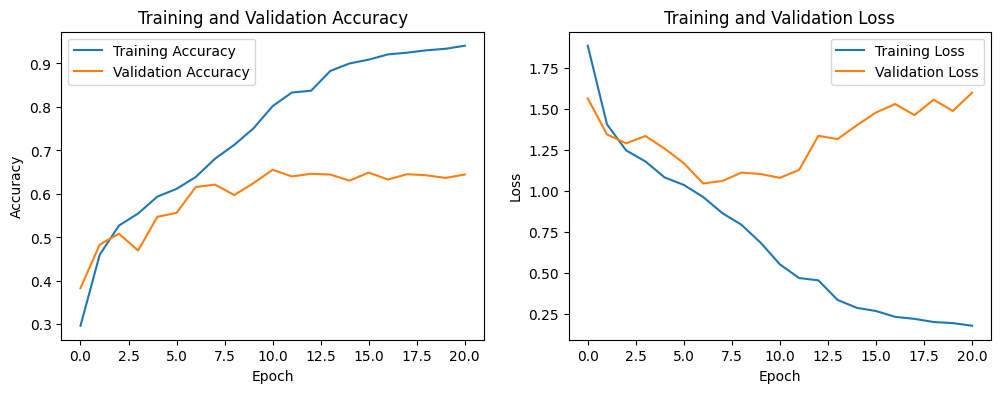

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'], label='Training Accuracy')
plt.plot(history_v2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'], label='Training Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [22]:
y_pred_v2 = best_model_v2.predict(X_test)
y_pred_classes_v2 = np.argmax(y_pred_v2, axis=1)

225/225 [==============================] - 3s 12ms/step


In [23]:
misclassified_indexes = np.where(y_pred_classes_v2 != y_test)[0]
misclassified_index = misclassified_indexes[0]

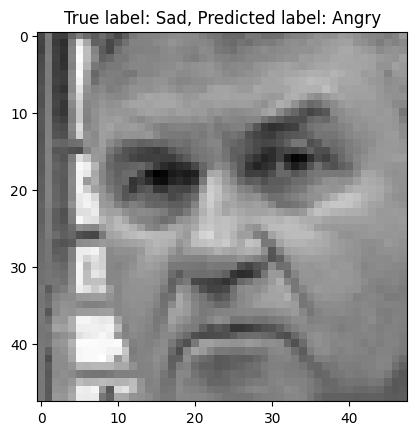

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_test[misclassified_index].reshape(48, 48), cmap='gray')
plt.title(f"True label: {emotion_labels[y_test[misclassified_index]]}, Predicted label: {emotion_labels[y_pred_classes_v2[misclassified_index]]}")
plt.show()


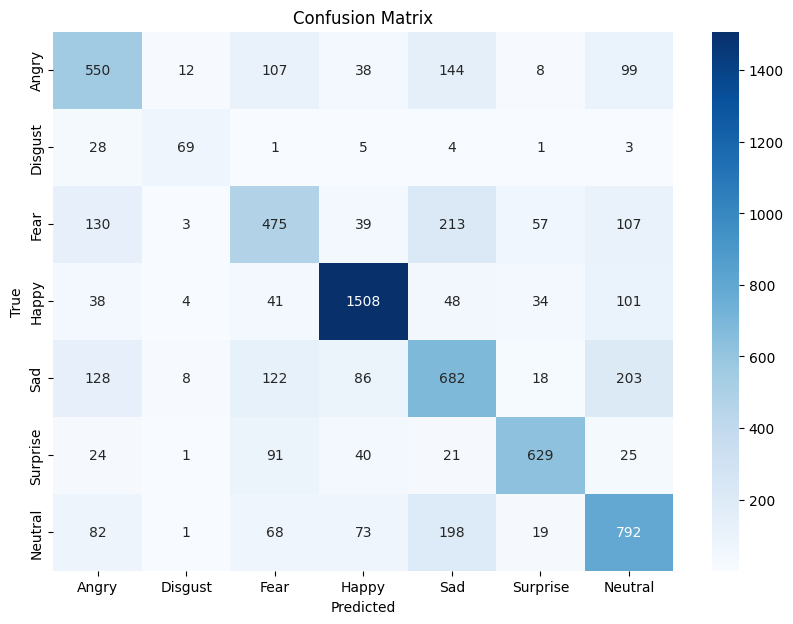

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes_v2)
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [28]:
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D

In [44]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Input

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Concatenate

def build_model_v3():
    # Convert grayscale images to 3-channel images
    input_layer = Input(shape=(48, 48, 1))
    x = Concatenate()([input_layer, input_layer, input_layer])

    # Load the pre-trained MobileNetV2 model with ImageNet weights
    base_model = MobileNetV2(input_tensor=x, weights='imagenet', include_top=False)

    # Add custom layers for the emotion analysis task
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=input_layer, outputs=predictions)

    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model





In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build and compile the new model
model_v3 = build_model_v3()

# Train the new model with early stopping
history_v3 = model_v3.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluate the new model on the test data
test_loss_v3, test_acc_v3 = model_v3.evaluate(X_test, y_test, verbose=0)

print("Test loss (v3):", test_loss_v3)
print("Test accuracy (v3):", test_acc_v3)


Epoch 1/500
898/898 [==============================] - 46s 45ms/step - loss: 1.8789 - accuracy: 0.3321 - val_loss: 3.2160 - val_accuracy: 0.3009
Epoch 2/500
898/898 [==============================] - 37s 41ms/step - loss: 1.4363 - accuracy: 0.4624 - val_loss: 1.8486 - val_accuracy: 0.4448
Epoch 3/500
898/898 [==============================] - 36s 40ms/step - loss: 1.2757 - accuracy: 0.5261 - val_loss: 2.0902 - val_accuracy: 0.3812
Epoch 4/500
898/898 [==============================] - 36s 40ms/step - loss: 1.1905 - accuracy: 0.5554 - val_loss: 1.4831 - val_accuracy: 0.5152
Epoch 5/500
898/898 [==============================] - 36s 40ms/step - loss: 1.1322 - accuracy: 0.5801 - val_loss: 1.5304 - val_accuracy: 0.5104
Epoch 6/500
898/898 [==============================] - 36s 40ms/step - loss: 1.0961 - accuracy: 0.5953 - val_loss: 1.9466 - val_accuracy: 0.4426
Epoch 7/500
898/898 [==============================] - 36s 40ms/step - loss: 1.0659 - accuracy: 0.6099 - val_loss: 2.0894 - val_ac

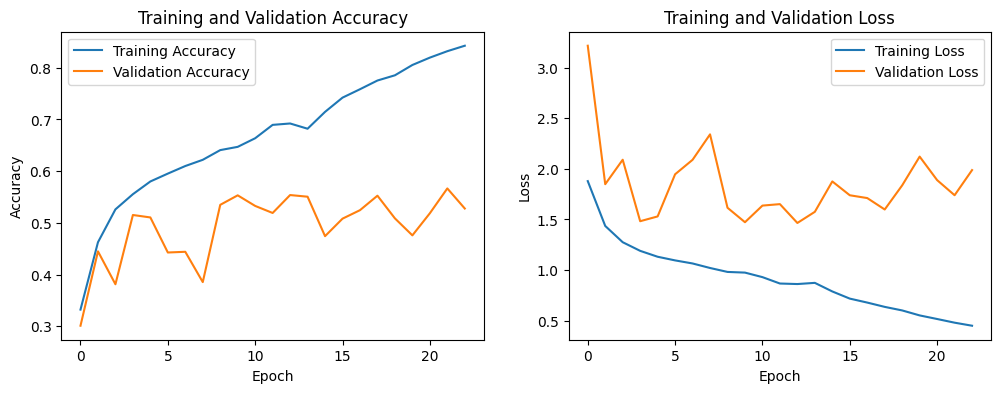

In [46]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_v3.history['accuracy'], label='Training Accuracy')
plt.plot(history_v3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_v3.history['loss'], label='Training Loss')
plt.plot(history_v3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [47]:
y_pred_v3 = model_v3.predict(X_test)
y_pred_classes_v3 = np.argmax(y_pred_v3, axis=1)

225/225 [==============================] - 3s 12ms/step


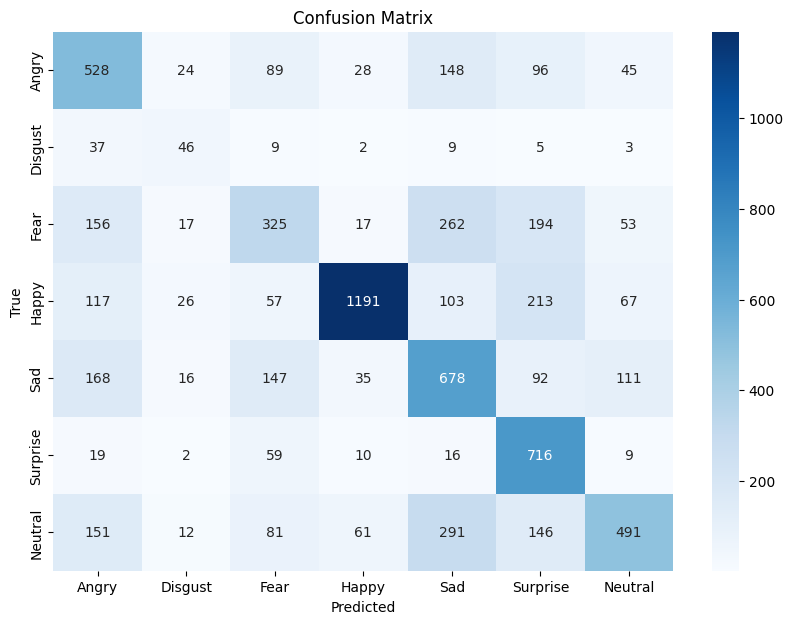

In [48]:
cm = confusion_matrix(y_test, y_pred_classes_v3)
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()